# Spam messages Prediction

## Importing required libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

C:\Users\pankaj\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
msg = pd.read_csv('D:\data science\NLP\spam.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 15-16: malformed \N character escape (<ipython-input-2-c15912aa5eb8>, line 1)

In [3]:
msg = pd.read_csv("D:/data science/NLP/spam.csv" , encoding= "cp1252")
msg

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
6772,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
6773,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
6774,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
msg.shape

(6776, 5)

In [5]:
msg.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Data Preprocessing

In [6]:
msg.v1.value_counts()

ham     5854
spam     922
Name: v1, dtype: int64

In [7]:
msg = msg.iloc[ : , [0,1]]

In [8]:
msg

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...
6772,ham,Will Ì_ b going to esplanade fr home?
6773,ham,"Pity, * was in mood for that. So...any other s..."
6774,ham,The guy did some bitching but I acted like i'd...


In [9]:
msg.rename(columns= {"v1": "label" , "v2": "message"} , inplace= True)

C:\Users\pankaj\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
length = msg.message.apply(len)

In [12]:
length

0       111
1        29
2       155
3        49
4        61
       ... 
6771    161
6772     37
6773     57
6774    125
6775     26
Name: message, Length: 6776, dtype: int64

In [13]:
msg = pd.concat([msg , length], axis=1)

In [14]:
msg.head()

,label,message,message
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
msg.columns.values[2] = "length"

In [16]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
from nltk.corpus import stopwords

In [18]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def data_prepration(mess):
    """
    1. This function will remove the punctuation.
    2. This function will also remove the stopwords.
    3. At the end this function will return the list of clean textword
    """
    remove_punctuations = [character for character in mess if character not in string.punctuation]
    remove_punctuations = "".join(remove_punctuations)
    
    return[word for word in remove_punctuations.split() if word not in stopwords.words("english")]


In [22]:
msg['message'].apply(data_prepration)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
6771    [This, 2nd, time, tried, 2, contact, u, U, å£7...
6772             [Will, Ì, b, going, esplanade, fr, home]
6773                     [Pity, mood, Soany, suggestions]
6774    [The, guy, bitching, I, acted, like, id, inter...
6775                              [Rofl, Its, true, name]
Name: message, Length: 6776, dtype: object

In [23]:
msg.message = msg.message.str.lower()
msg.message

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
6771    this is the 2nd time we have tried 2 contact u...
6772                will ì_ b going to esplanade fr home?
6773    pity, * was in mood for that. so...any other s...
6774    the guy did some bitching but i acted like i'd...
6775                           rofl. its true to its name
Name: message, Length: 6776, dtype: object

## Wordcloud

In [24]:
from wordcloud import WordCloud
WordCloud

wordcloud.wordcloud.WordCloud

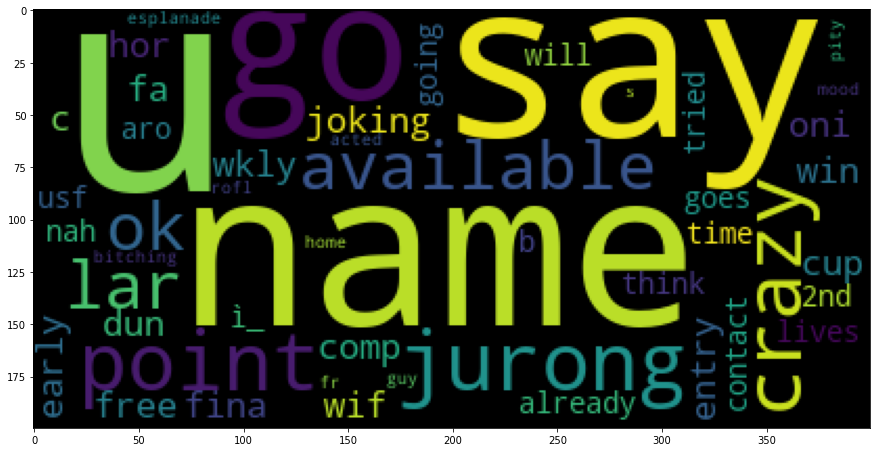

In [25]:
wc = WordCloud(max_words=50)

wc_img= wc.generate(str(msg.message))

fig = plt.figure(figsize=(15,15))
plt.imshow(wc_img)

In [26]:
df_spam= msg[msg.label =='spam']
df_spam.head

<bound method NDFrame.head of      label                                            message  length
2     spam  free entry in 2 a wkly comp to win fa cup fina...     155
5     spam  freemsg hey there darling it's been 3 week's n...     148
8     spam  winner!! as a valued network customer you have...     158
9     spam  had your mobile 11 months or more? u r entitle...     154
11    spam  six chances to win cash! from 100 to 20,000 po...     136
...    ...                                                ...     ...
6741  spam  want explicit sex in 30 secs? ring 02073162414...      90
6744  spam  asked 3mobile if 0870 chatlines inclu in free ...     160
6751  spam  had your contract mobile 11 mnths? latest moto...     160
6770  spam  reminder from o2: to get 2.50 pounds free call...     147
6771  spam  this is the 2nd time we have tried 2 contact u...     161

[922 rows x 3 columns]>

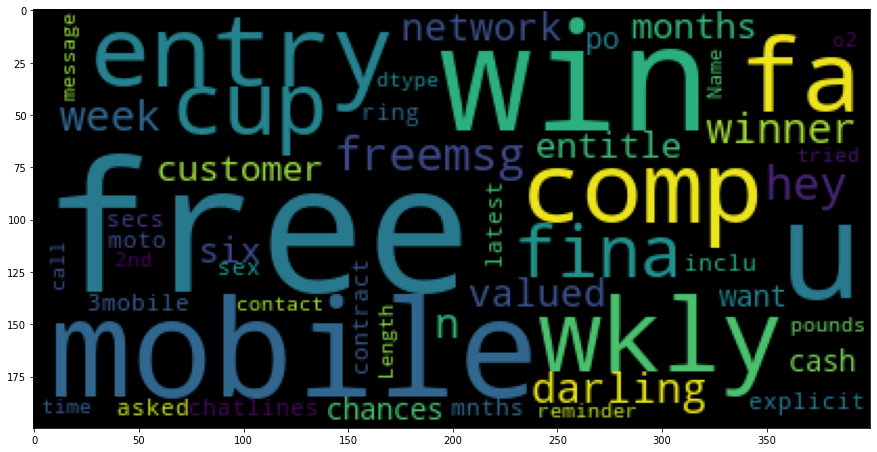

In [27]:
wc = WordCloud(max_words=50)

wc_img= wc.generate(str(df_spam.message))

fig = plt.figure(figsize=(15,15))
plt.imshow(wc_img)

In [28]:
df_ham= msg[msg.label =='ham']
df_ham.head

<bound method NDFrame.head of      label                                            message  length
0      ham  go until jurong point, crazy.. available only ...     111
1      ham                      ok lar... joking wif u oni...      29
3      ham  u dun say so early hor... u c already then say...      49
4      ham  nah i don't think he goes to usf, he lives aro...      61
6      ham  even my brother is not like to speak with me. ...      77
...    ...                                                ...     ...
6769   ham                                       huh y lei...      12
6772   ham              will ì_ b going to esplanade fr home?      37
6773   ham  pity, * was in mood for that. so...any other s...      57
6774   ham  the guy did some bitching but i acted like i'd...     125
6775   ham                         rofl. its true to its name      26

[5854 rows x 3 columns]>

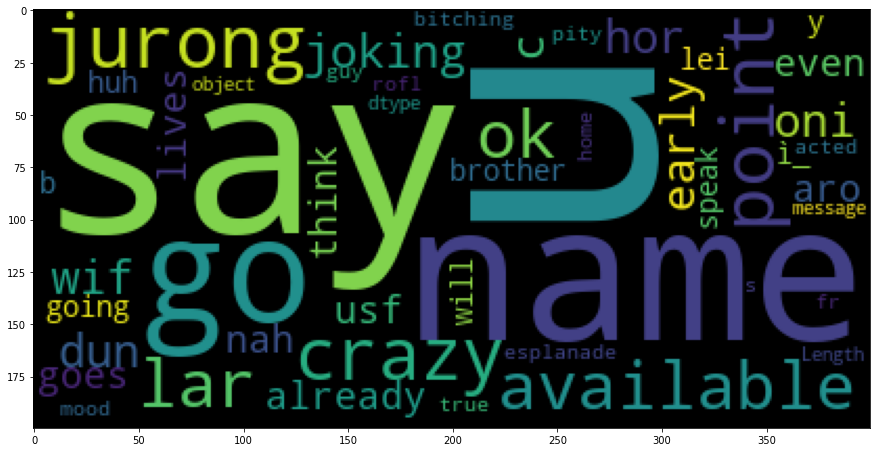

In [29]:
wc = WordCloud(max_words=50)

wc_img= wc.generate(str(df_ham.message))

fig = plt.figure(figsize=(15,15))
plt.imshow(wc_img)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer= data_prepration).fit(msg['message'])

In [31]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [32]:
print(len(bow_transformer.vocabulary_))

9422


In [33]:
msg_bow = bow_transformer.transform(msg.message)

In [34]:
msg_bow.shape

(6776, 9422)

In [35]:
type(msg_bow)

scipy.sparse.csr.csr_matrix

## Data Splitting

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(msg_bow, msg.label,test_size = 0.2)

In [38]:
x_train.shape

(5420, 9422)

In [39]:
x_test.shape

(1356, 9422)

In [40]:
y_train.shape

(5420,)

In [41]:
y_test.shape

(1356,)

## Model Building

### 1.NaiveBayes

In [42]:
##naive bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [43]:
nb_model= nb.fit(x_train,y_train)

In [44]:
pred_nb = nb_model.predict(x_test)

In [45]:
pred_nb

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
tab_nb = confusion_matrix(pred_nb,y_test)

In [48]:
tab_nb

array([[1139,   12],
       [  17,  188]], dtype=int64)

In [49]:
tab_nb.diagonal().sum()/tab_nb.sum()*100   #Accuracy

97.86135693215338

In [50]:
1138/(1138+25)    #Acuuracy for ham class

0.9785038693035254

In [51]:
188/(188+5)      #Acuuracy for spam class

0.9740932642487047

### 2.Decision Tree

In [52]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [53]:
dt_model= dt.fit(x_train,y_train)

In [54]:
pred_dt = dt_model.predict(x_test)

In [55]:
tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[1149,   36],
       [   7,  164]], dtype=int64)

In [56]:
tab_dt.diagonal().sum()/tab_dt.sum()*100   #Accuracy

96.82890855457227

In [57]:
1145/(1145+18)    #Acuuracy for ham class

0.9845227858985383

In [58]:
158/(158+35)    #Acuuracy for spam class

0.8186528497409327

## Conclusion 
- NaiveBayes giving the best result for both classes